In the last file, we learned about the two sample independent t-test, which allowed us to compare the means of two groups. 

In this file, we'll learn about how we can perform a hypothesis test on a different data type: **categorical data**. 

As its name suggests, categorical data is just a collection of categories. A good example of categorical data could be t-shirt size, which could come in small, medium and large sizes. 

Categorical data is one of the most common data types we might encounter as a data scientist, so it would be good to develop a familiarity with a hypothesis test we can use with it.

Categorical data often comes from surveys, where questions may ask participants about their race or income level. Both of these are great examples of categorical data. We'll be working with data on US income and demographics throughout this file.

Each row represents a single person who was counted in the `1990` US Census, and contains information about their income and demographics. Here are some of the relevant columns:

* `age`: how old the person is
* `workclass`: the type of sector the person is employed in.
* `race`: the race of the person.
* `sex`: the gender of the person, either `Male` or `Female`.

We've asked one of our data engineers to produce a small subset of the Census data. We were supplied with a dataset with `32561` rows. Initial inspection of the data shows that `10771` are female and `21790` are male. 

This sample data seems to be somewhat biased, since we would expect the ratio to be more evenly split between the two genders. However, we currently don't have anything in our toolkit that will allow us to test if this data is significantly different from what we expect. The first look at the data indicates that something is off, but we need a hypothesis test to confirm this. If the data were to really represent the 50:50 ratio of men and women, we would expect the numbers to look more like this:

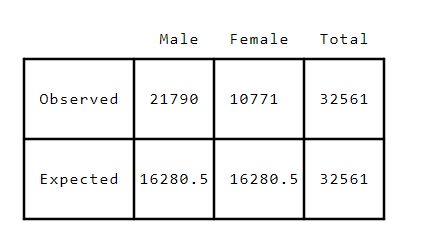

How can we know if the data the engineer gave us was biased? As we move through, we'll slowly develop the intuition behind the hypothesis test for categorical data. At the end, we'll learn how to take other datasets and apply the same hypothesis test for future questions we may have about it.

Above, we turned our intuition about the data —that the gender split should be even— into an expected value. Given the size of the data and the expectation that there should be a 50:50 split, we would expect there to be 16280.5 men and women in the data set. With our observed data and these expected values, we can actually calculate how much the data deviates from what we expect from it.

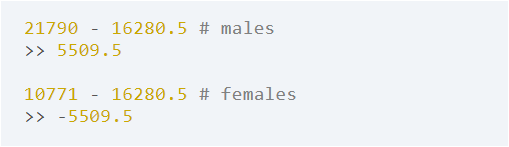

Notice that there is a clear relationship between the two values. We would interpret this difference as there being `5509.5` more males than what we expect, or `5509.5` less females than what we would expect. This number is useful, but we would prefer to have a more standardized way of expressing differences. The way we can do this is through percentages. 

Instead of just the raw differences, we can divide them by the expected values. Doing so will allow us to say what percentage the data deviates from our expectation.

In order to calculate the percent deviation away from the expected values, we can use the following formula:

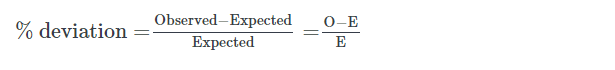

For our data, use the above formula to calculate the percent deviation away from our expected gender counts.

**Task**

* Compute the proportional difference in number of observed `Females` vs number of expected `Females`. 
* Compute the proportional difference in number of observed `Males` vs number of expected `Males`.

**Answer**

`female_diff <- (10771 - 16280.5) / 16280.5
male_diff <- (21790 - 16280.5) / 16280.5`

In the last file on the two sample independent t-test, we focused on the difference between the two groups because it was a simple, singular value that summarized how different the two groups were. It was our **test statistic** for the data. 

In hypothesis testing, we're always looking for a good test statistic for us to summarize the data and use to calculate the probability of observing the data we see. We are slowly moving towards our test statistic for categorical data, but we may have noticed a small snag.

Above we got `-0.338` for the female percent difference, and `0.338` for the male percent difference. Since an extra person in one gender always results in one less in the other, if we tried to sum these two values together, they'll always go to `0`. 

So, the sum of the raw deviations in all the categories won't do us any good. One way for us to still use these percent differences and prevent them from cancelling each other out is to square the difference, as shown below:

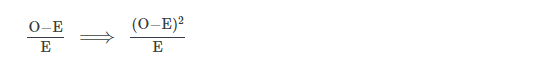

Squaring the difference has other useful mathematical properties. In addition to preventing deviations from cancelling each other out, they make large deviations from expected values more apparent. 

Squaring small values will still create small values, but squaring large numbers will make them grow exponentially larger. This has the added benefit of alerting us when there are particularly large deviations from our expectations.

Once we sum all of the squred deviations together, we'll have a single test statistic that successfully summarizes the amount of deviation we see in our sample Census data.

**Task**

* Compute the difference in number of `observed Females` vs number of `expected Females` using the updated technique.
* Compute the difference in number of `observed Males` vs number of `expected Males` using the updated technique.
* Add both above result together.

**Answer**

`female_diff_sq <- (10771 - 16280.5)^2 / 16280.5
male_diff_sq <- (21790 - 16280.5)^2 / 16280.5
squared_diff_sum <- female_diff_sq + male_diff_sq`

Up until now, we've provided more mathematical justifcations for the formulas that we've used so far. Along with the mathematical justifications, there are strong statistical justifications. We'll have another look at the initial formula we used to calculate percent difference from expectation.

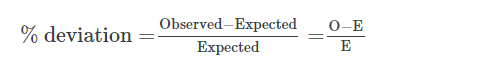

This formula has a similar form to the t-statistic;

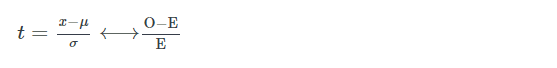

Standardizing by the expected value is similar to standardizing by the standard deviation. It turns out that both of these values **follow a standard normal distribution**! Here is the intution behind this: 

If we were to look at many, many sample datasets on the census, we would expect to see mostly small deviations from our expectations on the gender counts and get rare large deviations from what we expect. If we plotted a probability distribution of these deviations, we would observe a normal distribution. We weren't kidding when we said that the normal distribution appears everywhere in statistics!

Now comes another statistical revelation. In order to prevent the sum of the percent differences from cancelling each other out, we needed to square the difference:

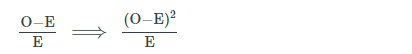

Squaring a value that comes from a standard normal distribution changes what distribution it comes from. Thankfully, this new probability distribution is also well studied. There's no need to understand the technical details behind this, but it's good to know that squaring a standard normal distribution produces a **chi-squared distribution** (pronounced KAI-squared).

Recall that in the last file, we took advantage of the fact that the difference in means followed a normal distribution. Our null hypothesis assumed that the difference in the means was 0. Afterwards, we looked at how extreme our test statistic was under the null hypothesis, where we assumed the difference in means would be 0. 

Finally, we calculated the probability of seeing our test statistic or more extreme statistics under the null hypohthesis and called it our **p-value**.

We have followed almost the same process here with the categorical data. We have created a test statistic — the sum of squared deviations— that summarizes the amount of deviation in our data. This test statistic, as we just found out, follows a chi-squared distribution, so we would also call it a **chi-squared statistic**. 

Our job now is to figure out what our null hypothesis is and then see how extreme our test statistic is under this assumption. Again, we are taking advantage of the fact that probability distributions can represent a hypothesis about the world. If the test statistic we observe is very improbable, it suggests that we should reject the null hypothesis.

Many times, data scientists will blindly use hypothesis tests without having any understanding of why they allow us to reject hypotheses. Just having an awareness of the process of hypothesis testing and its justifications puts us a step ahead.

Early in the file, we assumed that the data have an even split between males and females. This was essentially the declaration of our null hypothesis, but we still have yet to formally define it. This step is easy to forget as a data scientist, but it is an essential one. 

It is best practice to lay out to ourself and teammates precisely what hypothesis we were trying to reject. Below, we will formally lay out our pair of hypotheses:

* $H_0$: the data sample is not different from the Census data based on the gender ratio
* $H_A$: the data sample is different from the Census data based on the gender ratio


We already have our test statistic, the sum of squared deviations. We also know that this test statistic follows a chi-squared distribution. However, we need to use some information from our null hypothesis to know which chi-squared distribution to use. 

The chi-squared distribution actually comes from a family of distributions that are related to each other, but differ in a small way. We've seen this before with the normal distribution. 

We can shift where a normal distribution is on the number line by changing its mean, and we can change how fat or skinny it is based on what we use for its standard deviation. These two values are called **parameters** for the null distribution. Most probability distributions have parameters that slightly change how the distribution will look.

For a chi-squared distribution, the parameter that changes its shape is called its **degrees of freedom**. Degrees of freedom is a complex parameter to explain, but in short, it describes how many independent variables are used to calculate the test statistic. 

In this case, we used two pieces of information: 
1. the squared difference of the males and 
2. the squared difference of the females. 

For a chi-squared distribution, the degrees of freedom is the number of categories we used to sum up to make the test statistic, minus one. Since we used two genders here, the degrees of freedom for the chi-distribution under the null hypothesis would be 1.

Don't worry if this sounds too technical, the important information we need to glean away from knowing about degrees of freedom is that it influences the chi-squared distribution we use, and it's relatively easy to calculate.

Below is a visualization of what a chi-squared distribution with 1 degree of freedom.

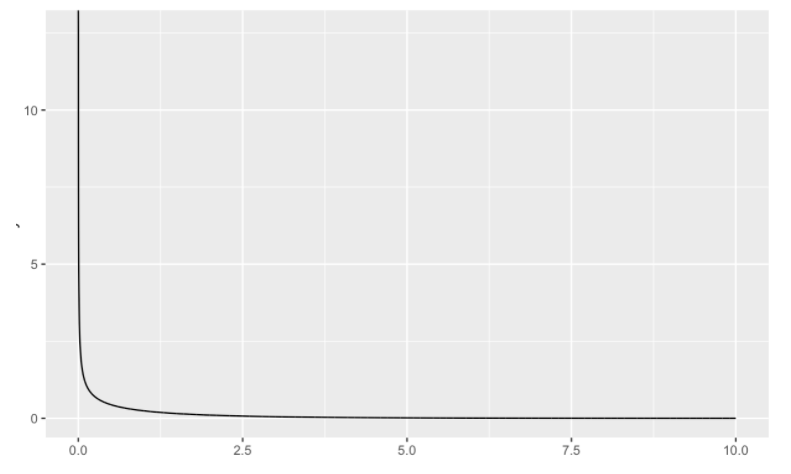

Most of the probability is between 0 and 1 in this chi-squared distribution. Anything bigger than 1 has an extremely low probability of happening. 

With this in mind, we can already expect that test statistics with high values would most likely have low probabilities. The test statistic we calculated was `3728`, so the we can already see that the probability of observing this test statistic is extremely low.

Just so we know how extreme this statistic is, calculate the **p-value** of this statistic. In order to calculate the cumulative probability needed to get the **p-value**, we can use the `pchisq()` function. 

For this function we need to input a value we want to calculate the cumulative probability for and how many degrees of freedom we need. For example, getting the cumulative probability of the value 1 in a chi-squared distribution with 1 degree of freedom is:

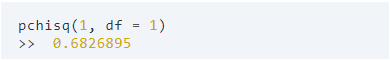

The pchisq function is just like the `pnorm()` function. R's functionalities for different probability distributions has a common naming scheme, making it easy to use.

**Task**

- Calculate the `p-value` for the test statistic of `3728`.
- Should we reject the null hypothesis based on this `p-value`? Assume that our threshold for rejecting the null hypothesis is 0.05. Assign `TRUE` to a variable `reject_null` if we think so, `FALSE` otherwise.

**Answer**

`pvalue <- 1 - pchisq(3728, 1)
reject_null <- TRUE`

The p-value we calculated above was so small that it essentially rounded down to 0, so we rejected the null hypothesis. 

The data engineer probably gave us a poor subset of the Census data. However, we enjoyed an exceptionally large sample size for both the males and females in our sample. 

The chi-squared distribution is what we call sensitive to small sample sizes. That is, if the sample size of our data set was a lot smaller, it might drastically change what the resulting test statistic could be. The change could be so drastic that we might accidentally fail to reject the null hypothesis when it is actually false. We'll demonstrate this using the following example

Let's say we only received a dataset with `20` rows, but it had the same observed and expected proportions:

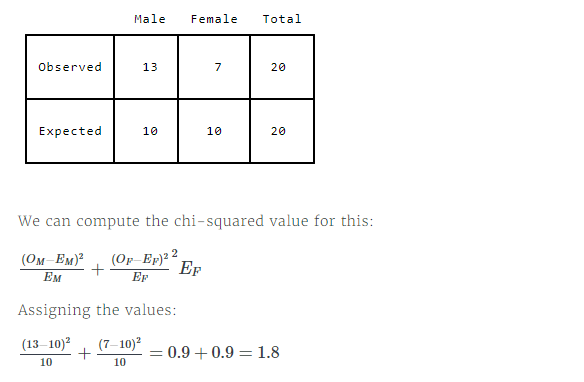

Using above test statistic, recalculate the p-value and reassess if we should still reject our null hypothesis.

**Task**

* Calculate the **p-value** for the test statistic of `1.8`.
* Should we reject the null hypothesis based on this p-value? Assume that our threshold for rejecting the null hypothesis is 0.05. Assign `TRUE` if we think so, `FALSE` otherwise.

**Answer**

`pvalue <- 1 - pchisq(1.8, 1)
reject_null <- FALSE`

So far, we've worked with the simplest possible chi-squared statistic that has `2` categories. The chi-squared test allows us to work with any number of categories using the same basic formula. Let's consider the race column of the data. The possible values are `White`, `Black`, `Asian-Pac-Islander`, `Amer-Indian-Eskimo`, and `Other`.

These are the expected proportions taken straight from the full 1990 US Census:

* White: 80.3%
* Black: 12.1%
* Asian-Pac-Islander: 2.9%
* Amer-Indian-Eskimo: .8%
* Other: 3.9%

Now, here's a table showing what we actually observe in the data the engineer gave us:

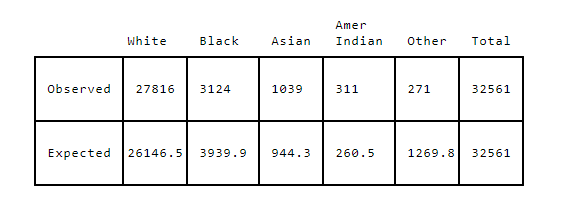

The data looks like it slightly deviates from expectation in terms of the `White` and `Other` category, but we can use hypothesis tests to really confirm this or not. Our hypotheses become:

* $H_0$: The proportions of different races in the same are the same as those in the full Census
* $H_A$: The proportions of different races in the same are not the same as those in the full Census

**Task**

* For each category (`White`, `Black`, `Asian-Pac-Islander`, `Amer-Indian-Eskimo`, and `Other`):
    * compute the difference between the expected and observed counts,
    * square the difference,
    * divide by the expected value,
    * keep a running sum of the squared differences
    * after summing everything, assign the result to `race_chisq`.
    
**Answer**

`race_chisq <- 0
observed <- c(27816, 3124, 1039, 311, 271)
expected <- c(26146.5, 3939.9, 944.3, 260.5, 1269.8)`

`for (i in 1:length(observed)) {
    E <- expected[i]
    O <- observed[i]
    race_chisq <- race_chisq + ((O - E)^2/E)
}`

Changing the number of categories that we examine changes the degrees of freedom for the chi-squared distribution that we use. Recall that the degrees of freedom is the number of categories minus 1. In this case, the degrees of freedom would be 4. The chart below shows that a chi-squared distribution with 4 degrees of freedom.

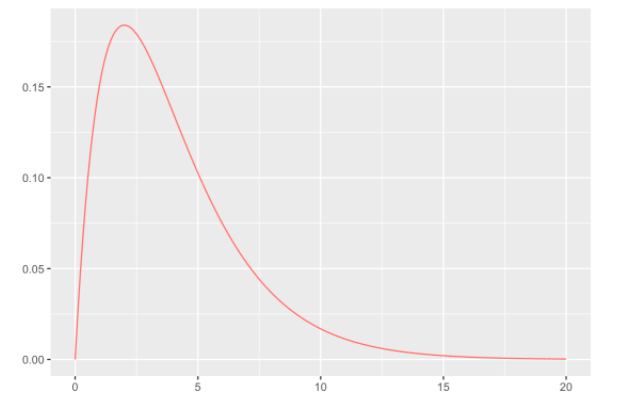

In the chi-squared distribution with 1 degree of freedom, most of the probability was between 0 and 1. As a chi-squared distribution gains more degrees of freedom, the distribution starts to gain a skewed bell shape. 

We have our chi-squared statistic of `785`, so we can calculate the p-value with the distribution under the null hypothesis.

Using the chi-squared test, evaluate whether or not we should reject the null hypothesis:

* $H_0$: The proportions of different races in the same are the same as those in the full Census
* $H_A$: The proportions of different races in the same are not the same as those in the full Census

**Task**

* Using our test statistic of `785`, calculate the p-value. 

**Answer**

`pvalue <- 1 - pchisq(785, 4)`

In this file, we introduced the chi-squared test, and showed how to use it to tell if observed and expected categorical frequency data differs significantly.